# < Python >

### 1. 데이터 불러오기 및 가공

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
import matplotlib
import statsmodels.api as sm

data = pd.read_csv("world-happiness-report-2021.csv")
data.head()

,Country name,Regional indicator,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia
0,Finland,Western Europe,7.842,10.775,0.954,72.0,0.949,-0.098,0.186,2.43
1,Denmark,Western Europe,7.620,10.933,0.954,72.7,0.946,0.030,0.179,2.43
2,Switzerland,Western Europe,7.571,11.117,0.942,74.4,0.919,0.025,0.292,2.43
3,Iceland,Western Europe,7.554,10.878,0.983,73.0,0.955,0.160,0.673,2.43
4,Netherlands,Western Europe,7.464,10.932,0.942,72.4,0.913,0.175,0.338,2.43


In [2]:
#칼럼명 변경
data = pd.read_csv("world-happiness-report-2021.csv")
data.columns = ['country','region','score', 'logGDP', 'ss', 'lifeexp', 'freedom', 'generosity', 'per_corrupt', 'dystopia']

#결측치 확인
data.isnull().sum()     #결측치는 없다. 

country        0
region         0
score          0
logGDP         0
ss             0
lifeexp        0
freedom        0
generosity     0
per_corrupt    0
dystopia       0
dtype: int64

In [3]:
#기초통계량
data.describe()

,score,logGDP,ss,lifeexp,freedom,generosity,per_corrupt,dystopia
count,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,1.490000e+02
mean,5.532839,9.432208,0.814745,64.992799,0.791597,-0.015134,0.727450,2.430000e+00
std,1.073924,1.158601,0.114889,6.762043,0.113332,0.150657,0.179226,5.347044e-15
min,2.523000,6.635000,0.463000,48.478000,0.382000,-0.288000,0.082000,2.430000e+00
25%,4.852000,8.541000,0.750000,59.802000,0.718000,-0.126000,0.667000,2.430000e+00
50%,5.534000,9.569000,0.832000,66.603000,0.804000,-0.036000,0.781000,2.430000e+00
75%,6.255000,10.421000,0.905000,69.600000,0.877000,0.079000,0.845000,2.430000e+00
max,7.842000,11.647000,0.983000,76.953000,0.970000,0.542000,0.939000,2.430000e+00


In [4]:
#region 변수 축소(새로운 변수 region_new 생성)

def column_change(region):
    if region in ['Central and Eastern Europe', 'Western Europe']:
        return 'Europe'
    elif region in ['East Asia', 'South Asia', 'Southeast Asia']:
        return 'Asia'
    elif region in ['Middle East and North Africa', 'Sub-Saharan Africa']:
        return 'Africa'
    elif region == 'Commonwealth of Independent States':
        return 'Independent States'
    elif region == 'Latin America and Caribbean':
        return 'South America'
    elif region == 'North America and ANZ':
        return 'North America/Australia'
    
data['region_new'] = data['region'].apply(column_change)

### 2. 데이터 탐색

In [5]:
#region.new(대분류)별 score 평균
data.groupby('region_new').score.mean()

region_new
Africa                     4.727113
Asia                       5.210136
Europe                     6.498789
Independent States         5.467000
North America/Australia    7.128500
South America              5.908050
Name: score, dtype: float64

North America/Australia의 평균이 가장 높으며 이는 가장 낮은 Africa의 약 1.5배이다.

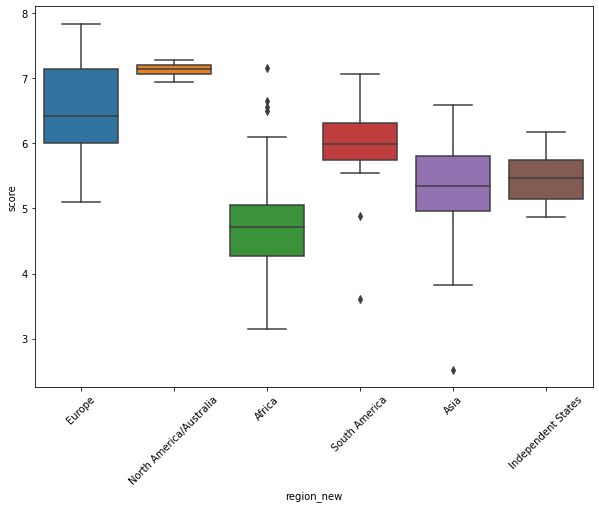

In [6]:
#region.new(대분류)별 score boxplot
plt.rcParams["figure.figsize"] = (10,7)
sns.boxplot(x = 'region_new', y='score',  data = data)
plt.xticks(rotation =  45)
plt.show()

Europe과 North America/Australia의 score가 다른 국가에 비해 높으며, Africa가 가장 낮다. Asia와 Independent States의 median은 비슷한 편이지만, Asia의 분포가 더 퍼져있다. South America의 경우에는 score가 대체로 높지만, 이상치도 두 개의 국가에서 존재한다.

In [7]:
#region.new(소분류)별 score 평균
data.groupby('region').score.mean()

region
Central and Eastern Europe            5.984765
Commonwealth of Independent States    5.467000
East Asia                             5.810333
Latin America and Caribbean           5.908050
Middle East and North Africa          5.219765
North America and ANZ                 7.128500
South Asia                            4.441857
Southeast Asia                        5.407556
Sub-Saharan Africa                    4.494472
Western Europe                        6.914905
Name: score, dtype: float64

앞의 결과와 마찬가지로 North America and ANZ 의 평균이 가장 높지만, 대륙을 세분화한 결과, South Asia의 행복도가 가장 낮은 것으로 나타났다.

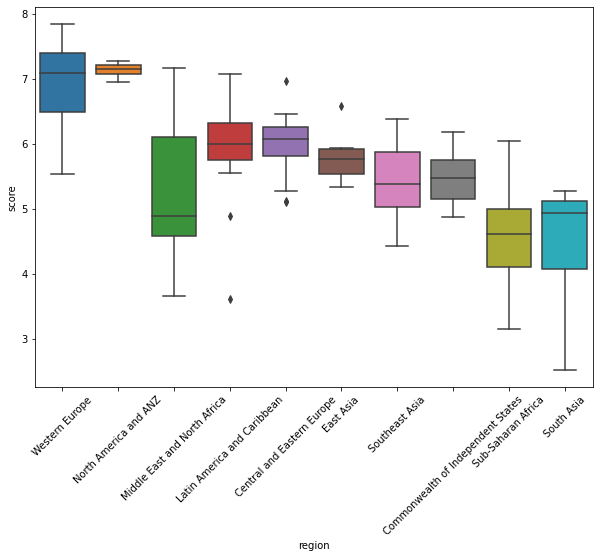

In [8]:
#region.new(소분류)별 score boxplot
plt.rcParams["figure.figsize"] = (10,7)
sns.boxplot(x = 'region', y='score',  data = data)
plt.xticks(rotation =  45)
plt.show()

유럽 중에서도 Western Europe이 행복도가 가장 높으며, 전체 국가들과 비교했을 때도 매우 높게 나타난다. North America and ANZ의 행복도 역시 높게 나타난다. South Asia의 경우, 중앙값은 Middle East and North Africa와 commonwealth of Independent States보다 높지만, 평균이 제일 낮은 것으로 보아, boxplot에서도 볼 수 있듯이 행복도가 매우 낮은 국가들이 상당수 존재하는 것을 알 수 있다. 

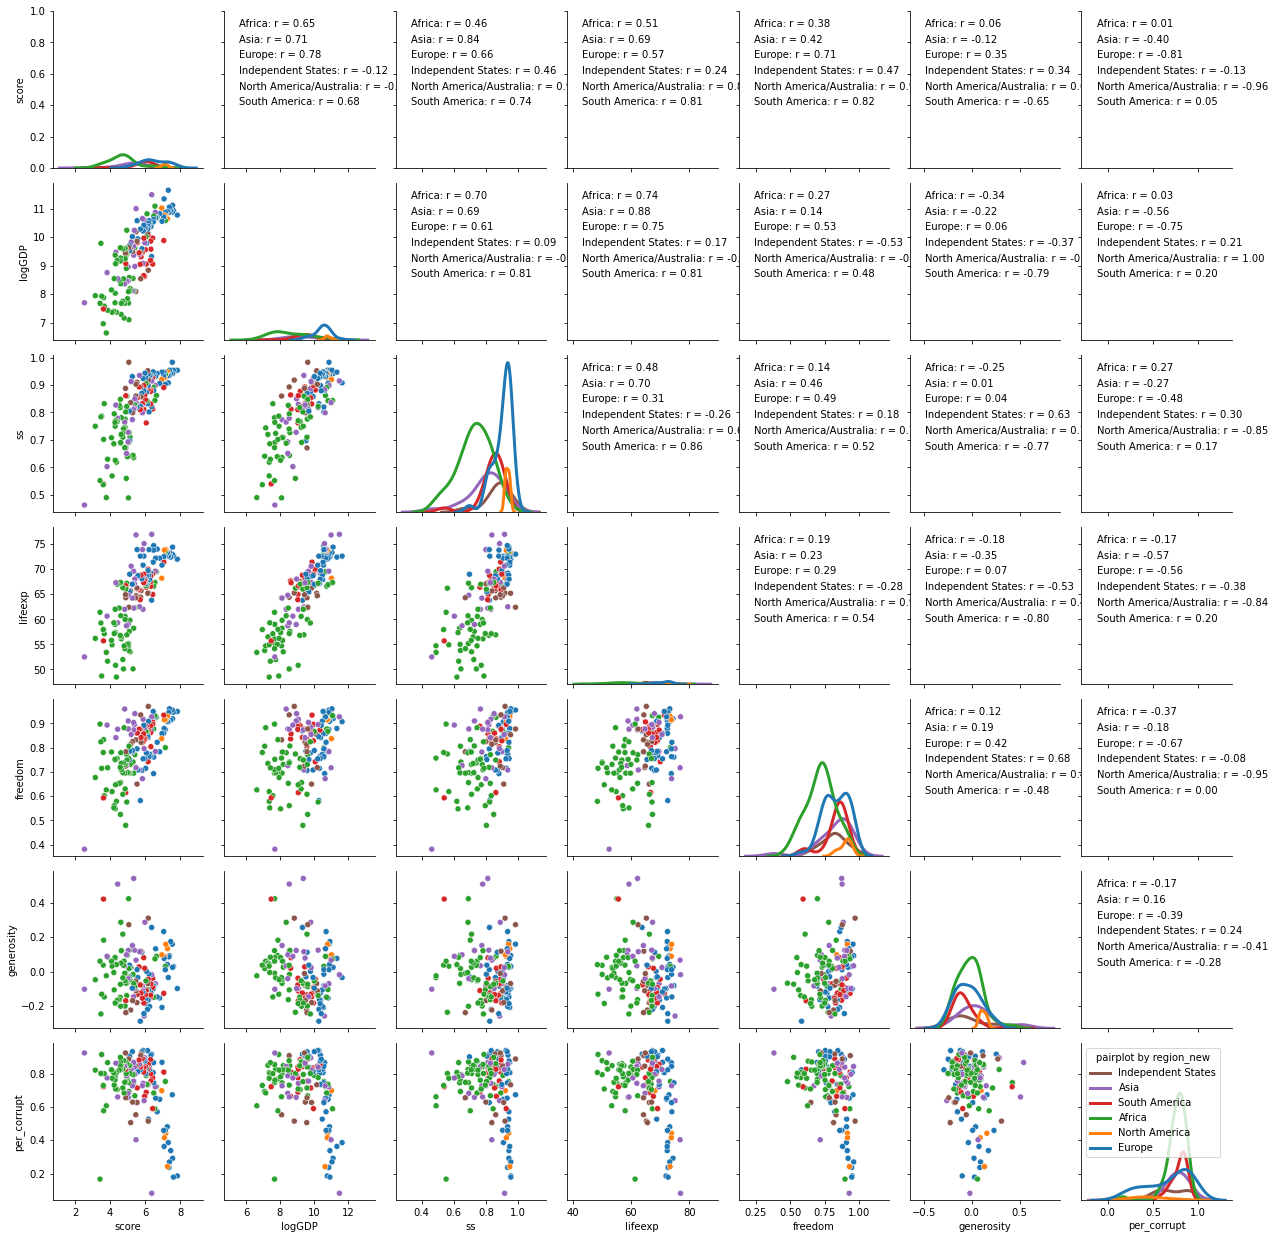

,score,logGDP,ss,lifeexp,freedom,generosity,per_corrupt
score,1.000000,0.789760,0.756888,0.768099,0.607753,-0.017799,-0.421140
logGDP,0.789760,1.000000,0.785299,0.859461,0.432323,-0.199286,-0.342337
ss,0.756888,0.785299,1.000000,0.723256,0.482930,-0.114946,-0.203207
lifeexp,0.768099,0.859461,0.723256,1.000000,0.461494,-0.161750,-0.364374
freedom,0.607753,0.432323,0.482930,0.461494,1.000000,0.169437,-0.401363
generosity,-0.017799,-0.199286,-0.114946,-0.161750,0.169437,1.000000,-0.163962
per_corrupt,-0.421140,-0.342337,-0.203207,-0.364374,-0.401363,-0.163962,1.000000


In [9]:
#scatterplot 및 correlation between variables

def corrfunc(x, y, **kws):
    r, _ = pearsonr(x, y)
    ax = plt.gca()
    if kws['label'] == 'Africa':
        pos = (.1, .9) 
    elif kws['label'] == 'Asia':
        pos = (.1, .8) 
    elif kws['label'] == 'Europe':
        pos = (.1, .7) 
    elif kws['label'] == 'Independent States':
        pos = (.1, .6) 
    elif kws['label'] == 'North America/Australia':
        pos = (.1, .5) 
    else :
        pos = (.1, .4)
    ax.annotate("{}: r = {:.2f}".format(kws['label'],r),
                xy=pos, xycoords=ax.transAxes)
    

g = sns.PairGrid(data.iloc[:, data.columns != 'dystopia'], hue='region_new') 
g.map_upper(corrfunc)
g.map_lower(sns.scatterplot)
g.map_diag(sns.kdeplot,lw=3,legend=True)
plt.legend(title='pairplot by region_new', loc='upper left', labels=['Independent States', 'Asia', 'South America', 'Africa','North America', 'Europe'])
plt.show()

data.iloc[:, data.columns != 'dystopia'].corr()

region_new 별로 색을 다르게하여 그래프를 나타내었다. scatter plot matrix의 오른쪽 상단 삼각형 부분에는 각 region별 상관계수를 나타내었다. 전체적으로 보았을 때,Africa(초록색)의 score, logGDP, ss, lifeexp, freedom의 수치가 상대적으로 다른 region에 비해 작다. score, logGDP, ss, lifeexp 네 변수는 서로 강한 양의 상관관계를 가지는 것으로 보이며, freedom 변수도 이들과 양의 상관관계를 가지는 것을 확인할 수 있다. per_corrupt 변수의 경우 대부분의 국가의 수치가 특정 범위 안(0.5이상)에 분포하지만, 많은 Europe 국가들의 수치는 이에 비해 낮은 것으로 보인다.

In [10]:
#score이 가장 높은 상위 10개국
high = data.sort_values('score', ascending=False).head(10)
high.iloc[:,[0,1,2,10]]

,country,region,score,region_new
0,Finland,Western Europe,7.842,Europe
1,Denmark,Western Europe,7.620,Europe
2,Switzerland,Western Europe,7.571,Europe
3,Iceland,Western Europe,7.554,Europe
4,Netherlands,Western Europe,7.464,Europe
5,Norway,Western Europe,7.392,Europe
6,Sweden,Western Europe,7.363,Europe
7,Luxembourg,Western Europe,7.324,Europe
8,New Zealand,North America and ANZ,7.277,North America/Australia
9,Austria,Western Europe,7.268,Europe


In [11]:
#score이 가장 높은 상위 10개국이 속한 대륙
high_count = high.groupby('region_new').score.count()
high_count

region_new
Europe                     9
North America/Australia    1
Name: score, dtype: int64

Text(0.5, 1.0, '10 countries region with highest score')

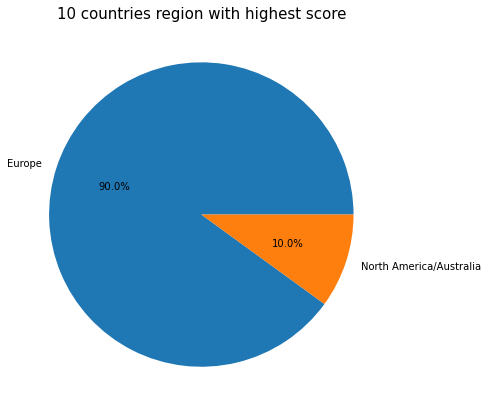

In [12]:
plt.rcParams["figure.figsize"] = (10,7)
labels_1 = [ 'Europe','North America/Australia']
plt.pie(high_count,autopct='%.1f%%',labels=labels_1)
plt.title('10 countries region with highest score', fontsize=15)

행복도가 높은 상위 10개국 중 9개국이 Europe, 특히 western Europe에 속해있다. 

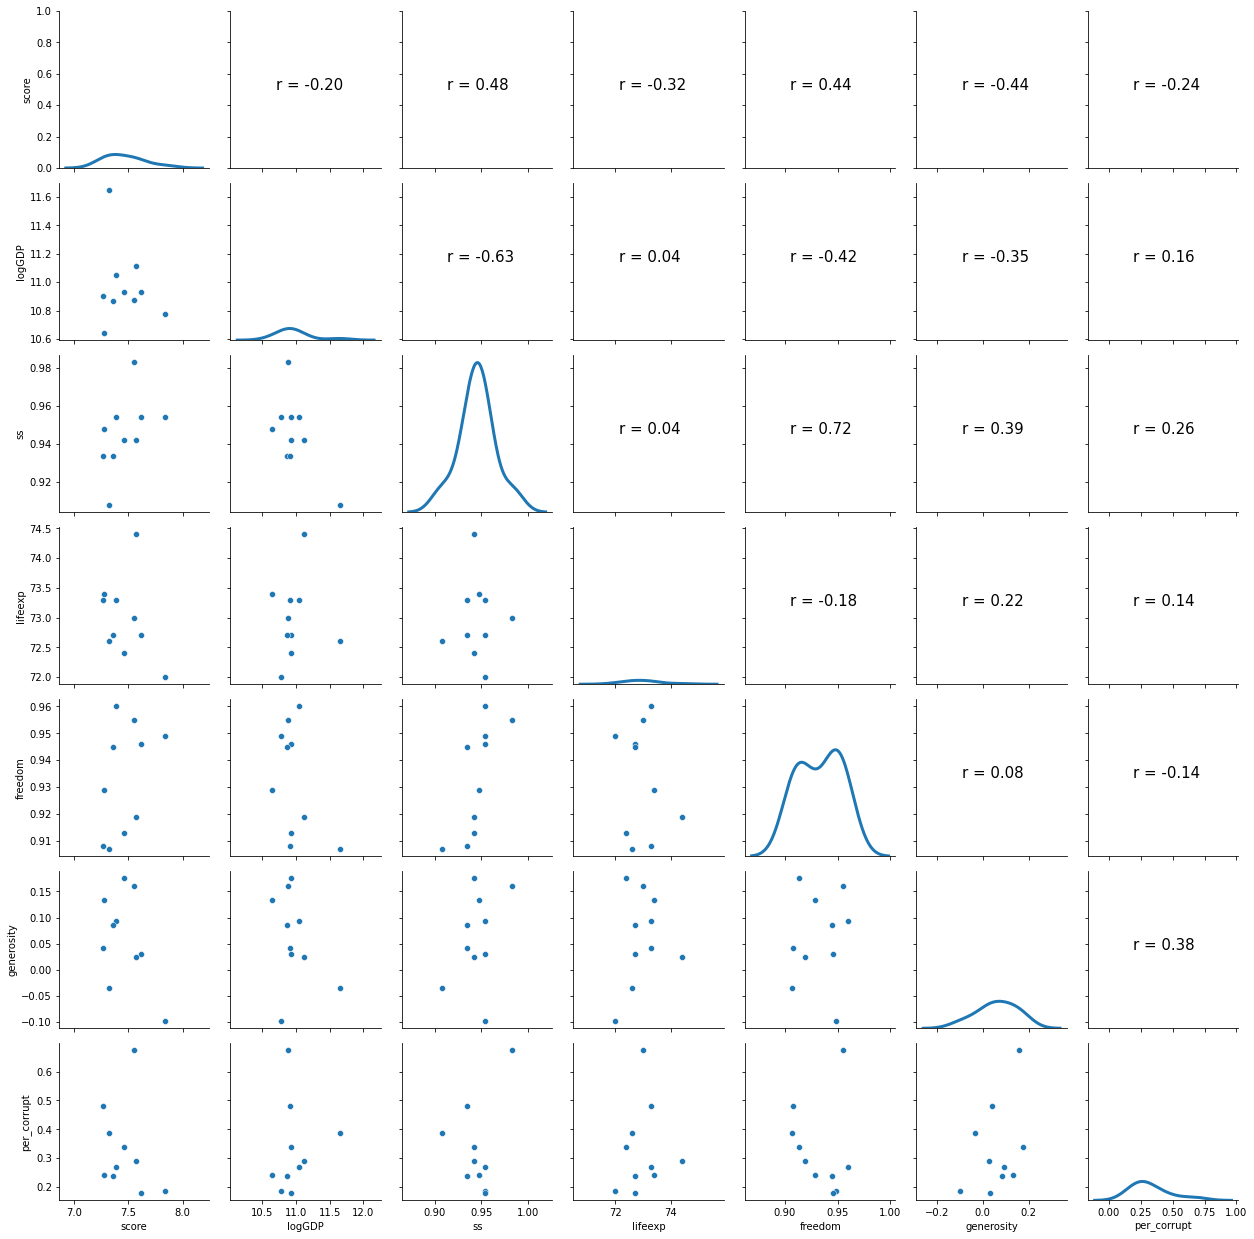

In [13]:
#score이 가장 높은 상위 10개국의 scatter plot matrix
def corrfunc2(x, y, **kws):
    r, _ = pearsonr(x, y)
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.3, .5), xycoords=ax.transAxes, size=15)     

g = sns.PairGrid(high.iloc[:, high.columns != 'dystopia']) 
g.map_upper(corrfunc2)
g.map_lower(sns.scatterplot)
g.map_diag(sns.kdeplot,lw=3,legend=True)
plt.show()

In [14]:
#score이 가장 낮은 상위 10개국
low = data.sort_values('score', ascending=False).tail(10)
low.iloc[:,[0,1,2,10]]

,country,region,score,region_new
139,Burundi,Sub-Saharan Africa,3.775,Africa
140,Yemen,Middle East and North Africa,3.658,Africa
141,Tanzania,Sub-Saharan Africa,3.623,Africa
142,Haiti,Latin America and Caribbean,3.615,South America
143,Malawi,Sub-Saharan Africa,3.600,Africa
144,Lesotho,Sub-Saharan Africa,3.512,Africa
145,Botswana,Sub-Saharan Africa,3.467,Africa
146,Rwanda,Sub-Saharan Africa,3.415,Africa
147,Zimbabwe,Sub-Saharan Africa,3.145,Africa
148,Afghanistan,South Asia,2.523,Asia


In [15]:
#score이 가장 낮은 상위 10개국이 속한 대륙
low_count = low.groupby('region_new').score.count()
low_count

region_new
Africa           8
Asia             1
South America    1
Name: score, dtype: int64

Text(0.5, 1.0, '10 countries region with lowest score')

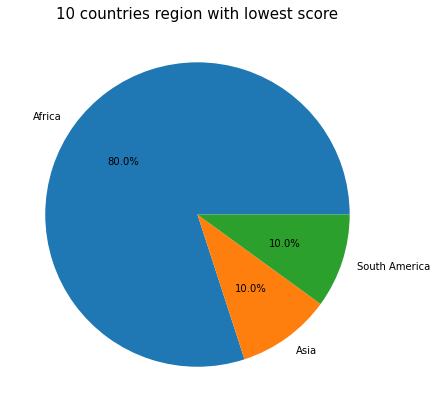

In [16]:
plt.rcParams["figure.figsize"] = (10,7)
labels_1 = ['Africa','Asia', 'South America']
plt.pie(low_count,autopct='%.1f%%',labels=labels_1)
plt.title('10 countries region with lowest score', fontsize=15)

행복도가 낮은 상위 10개국 중 8개국이 Africa에 속해있으며, 특히 Sub-Saharan Africa에 7개국이 속해있다.

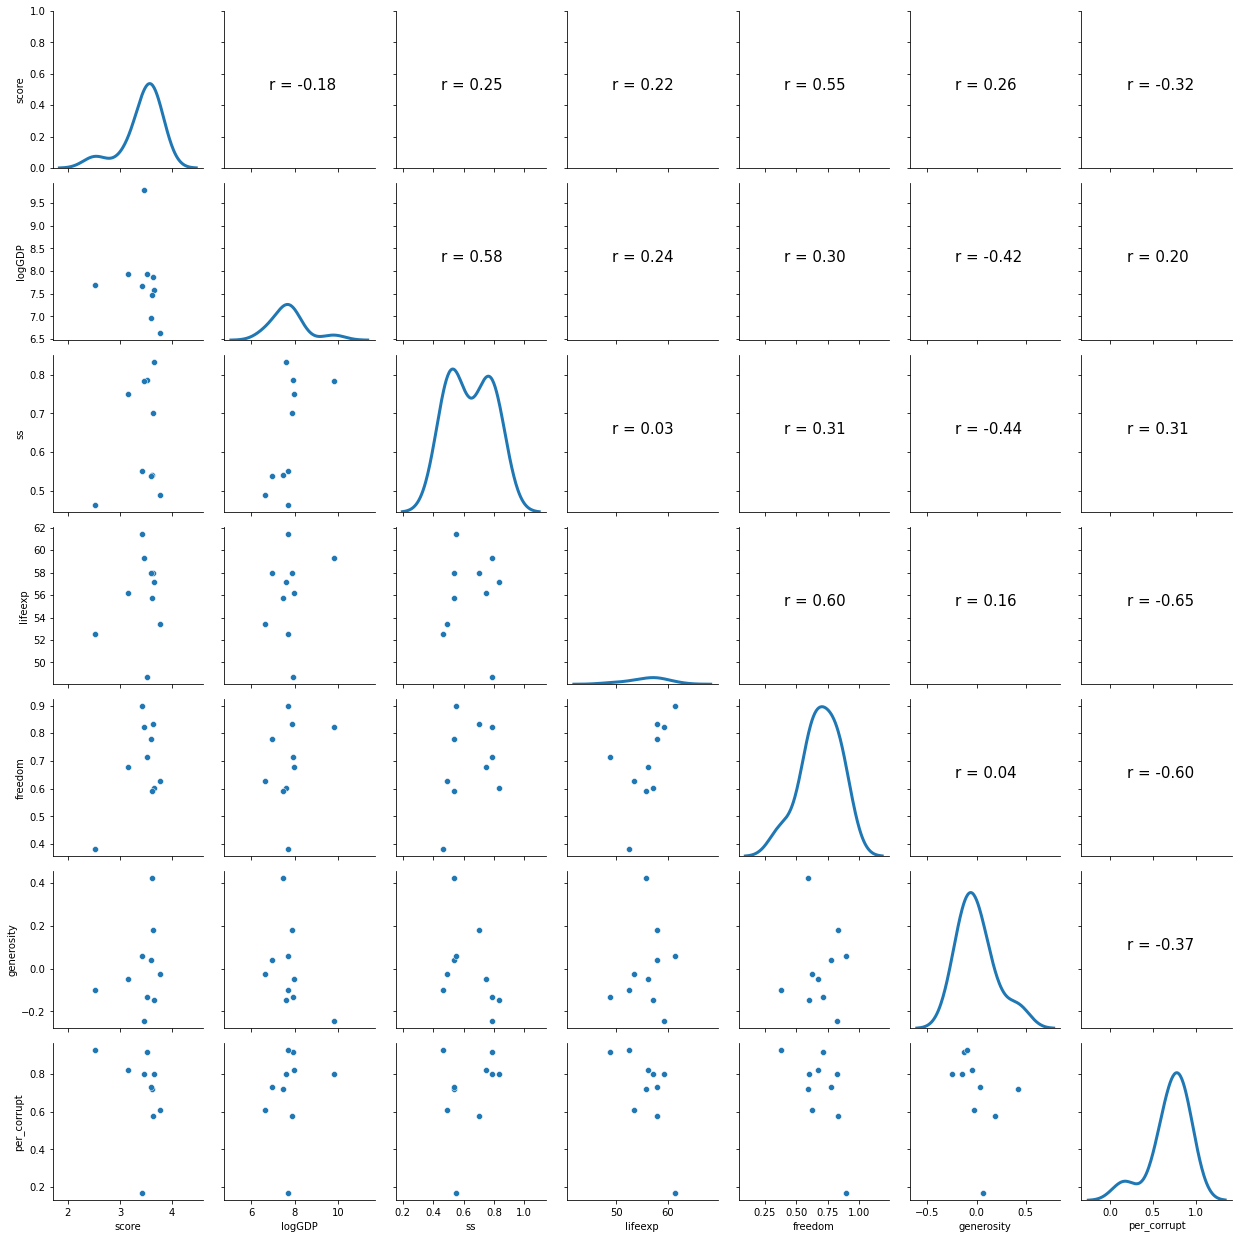

In [17]:
#score이 가장 낮은 상위 10개국의 scatter plot matrix
g = sns.PairGrid(low.iloc[:, low.columns != 'dystopia']) 
g.map_upper(corrfunc2)
g.map_lower(sns.scatterplot)
g.map_diag(sns.kdeplot,lw=3,legend=True)
plt.show()

In [18]:
#score이 높은 상위 10개국과 하위 10개국의 score, logGDP, ss, lifeexp의 평균 비교

high['happ_lv']='high'
low['happ_lv']='low'
high_low = pd.concat([high, low])
a1 = high_low.groupby('happ_lv').score.mean()
a2 = high_low.groupby('happ_lv').logGDP.mean()
a3 = high_low.groupby('happ_lv').ss.mean()
a4 = high_low.groupby('happ_lv').lifeexp.mean()

a = pd.concat([a1, a2], axis=1)
a = pd.concat([a, a3], axis=1)
a = pd.concat([a, a4], axis=1)
a

,score,logGDP,ss,lifeexp
happ_lv,,,,
high,7.4675,10.9751,0.9453,72.9800
low,3.4333,7.7546,0.6437,56.0232


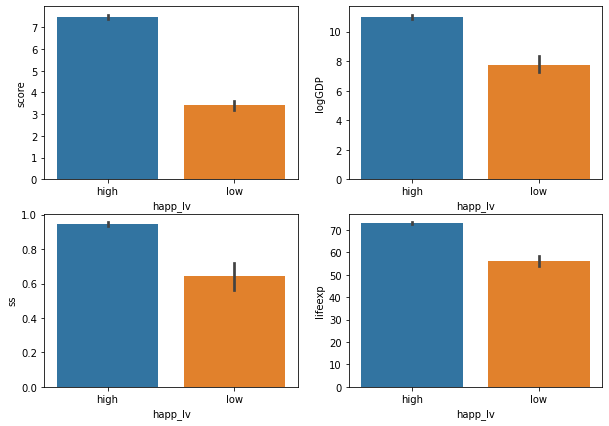

In [19]:
plt.rcParams["figure.figsize"] = (10,7)
plt.subplot(2, 2, 1) 
sns.barplot(x='happ_lv', y='score',data=high_low)
plt.subplot(2, 2, 2) 
sns.barplot(x='happ_lv', y='logGDP',data=high_low)
plt.subplot(2, 2, 3) 
sns.barplot(x='happ_lv', y='ss',data=high_low)
plt.subplot(2, 2, 4) 
sns.barplot(x='happ_lv', y='lifeexp',data=high_low)
plt.show()

- score이 높은 상위 10개국의 score 평균이 하위 10개국의 약 2.2배이다.
- score이 높은 상위 10개국의 logGDP 평균이 하위 10개국의 약 1.4배이다.
- score이 높은 상위 10개국의 ss 평균이 하위 10개국의 약 1.5배이다.
- score이 높은 상위 10개국의 lifeexp 평균이 하위 10개국의 약 1.3배이다.

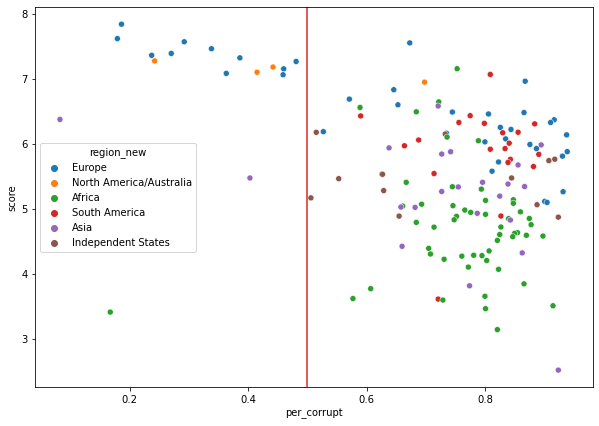

,country,region,score,logGDP,ss,lifeexp,freedom,generosity,per_corrupt,dystopia,region_new
0,Finland,Western Europe,7.842,10.775,0.954,72.000,0.949,-0.098,0.186,2.43,Europe
1,Denmark,Western Europe,7.620,10.933,0.954,72.700,0.946,0.030,0.179,2.43,Europe
2,Switzerland,Western Europe,7.571,11.117,0.942,74.400,0.919,0.025,0.292,2.43,Europe
4,Netherlands,Western Europe,7.464,10.932,0.942,72.400,0.913,0.175,0.338,2.43,Europe
5,Norway,Western Europe,7.392,11.053,0.954,73.300,0.960,0.093,0.270,2.43,Europe
6,Sweden,Western Europe,7.363,10.867,0.934,72.700,0.945,0.086,0.237,2.43,Europe
7,Luxembourg,Western Europe,7.324,11.647,0.908,72.600,0.907,-0.034,0.386,2.43,Europe
8,New Zealand,North America and ANZ,7.277,10.643,0.948,73.400,0.929,0.134,0.242,2.43,North America/Australia
9,Austria,Western Europe,7.268,10.906,0.934,73.300,0.908,0.042,0.481,2.43,Europe
10,Australia,North America and ANZ,7.183,10.796,0.940,73.900,0.914,0.159,0.442,2.43,North America/Australia


In [20]:
#perception of corruption과 행복도의 관계
plt.rcParams["figure.figsize"] = (10,7)
sns.scatterplot(x = 'per_corrupt', y='score', hue='region_new', data=data)
plt.axvline(x=0.5, color='tab:red')
plt.show()

data[data['per_corrupt']<0.5]

행복도 상위 4위를 제외한 상위 10개국이 모두 가장 낮은 perception of corruption을 보인다. 또한 perception of corruption이 0.5 미만인 대부분의 나라는 Western Europe과 North America/Australia 국가이다.

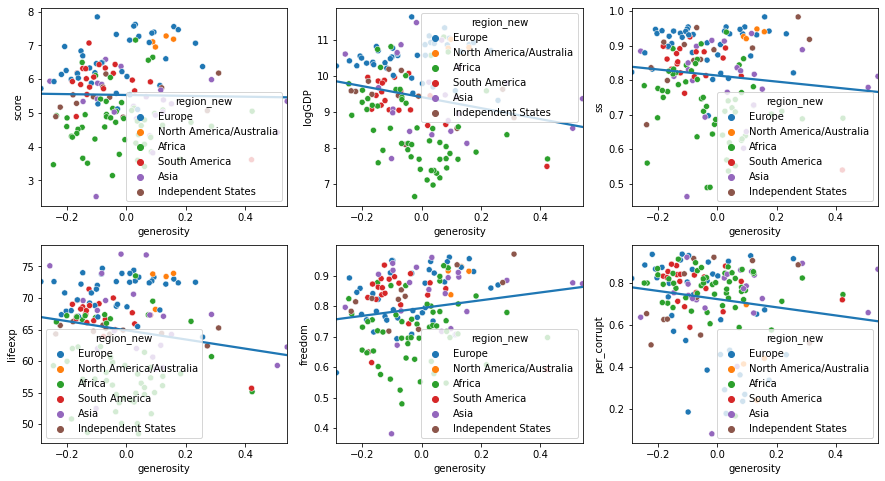

In [21]:
#generosity와 다른 변수들 간의 관계
plt.rcParams["figure.figsize"] = (15,8)

plt.subplot(2, 3, 1) 
sns.scatterplot(x = 'generosity', y='score', hue='region_new', data=data)
sns.regplot(data=data, x = 'generosity', y='score', scatter=False, ci=None)

plt.subplot(2, 3, 2) 
sns.scatterplot(x = 'generosity', y='logGDP', hue='region_new', data=data)
sns.regplot(data=data, x = 'generosity', y='logGDP', scatter=False, ci=None)

plt.subplot(2, 3, 3) 
sns.scatterplot(x = 'generosity', y='ss', hue='region_new', data=data)
sns.regplot(data=data, x = 'generosity', y='ss', scatter=False, ci=None)

plt.subplot(2, 3, 4) 
sns.scatterplot(x = 'generosity', y='lifeexp', hue='region_new', data=data)
sns.regplot(data=data, x = 'generosity', y='lifeexp', scatter=False, ci=None)

plt.subplot(2, 3, 5) 
sns.scatterplot(x = 'generosity', y='freedom', hue='region_new', data=data)
sns.regplot(data=data, x = 'generosity',y='freedom', scatter=False, ci=None)

plt.subplot(2, 3, 6) 
sns.scatterplot(x = 'generosity', y='per_corrupt', hue='region_new', data=data)
sns.regplot(data=data, x = 'generosity', y='per_corrupt', scatter=False, ci=None)

plt.show()


앞서 살펴본 scatter plot matrix에서 generosity 변수는 다른 변수와의 상관관계가 매우 낮았다. 다시 plot을 그려 살펴본 결과, score과는 상관관계가 거의 없으며, 다른 변수들과도 상대적으로 랜덤한 분포를 보여 상관관계가 미미한 것으로 보인다. lm line은 이상치의 영향을 받아서 상관관계가 상당히 있는 것처럼 보일 것이라는 예측도 가능하다. 또한, 국가의 region 별로 generosity에 대한 차이는 두렷하게 보이지 않는다.

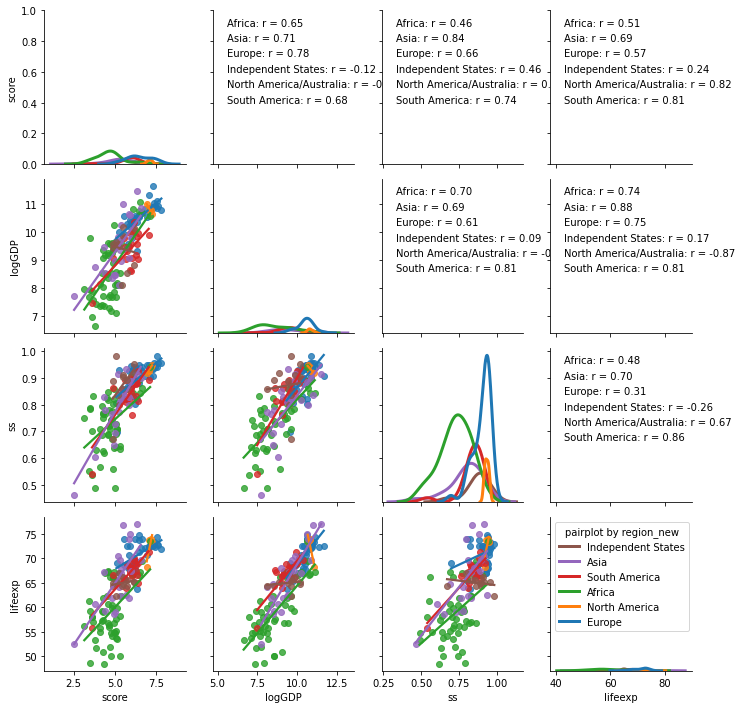

,score,logGDP,ss,lifeexp
score,1.000000,0.789760,0.756888,0.768099
logGDP,0.789760,1.000000,0.785299,0.859461
ss,0.756888,0.785299,1.000000,0.723256
lifeexp,0.768099,0.859461,0.723256,1.000000


In [22]:
# 상관계수가 높았던 변수에 대한 scatter plot matrix
g = sns.PairGrid(data.iloc[:, [2,3,4,5,10]], hue='region_new') 
g.map_upper(corrfunc)
g.map_lower(sns.regplot, ci=None)
g.map_diag(sns.kdeplot,lw=3,legend=True)
plt.legend(title='pairplot by region_new', loc='upper left', labels=['Independent States', 'Asia', 'South America', 'Africa','North America', 'Europe'])
plt.show()

data.iloc[:,[2,3,4,5,10]].corr()

score, logGDP, social support, life expectany 는 서로 강한 양의 상관관계를 보인다. region별로 살펴보면, Independent States 국가와 North America 국가들은 상관관계가 다른 지역 국가들과 달리 음의 상관관계를 갖는 경우도 있기는 하지만, 그 수가 적어 전체적인 상관관계 추이에는 영향을 주지 않는다. 따라서, 대부분의 국가에서는 행복도가 높으면 GDP, social support, life expectancy도 전체적으로 높다. 

In [23]:
#회귀분석
data['region'] = data['region'].astype('category')

model = sm.OLS.from_formula("score~ C(region) + logGDP + ss + lifeexp+ freedom + generosity + per_corrupt + dystopia", data)
result = model.fit() 
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  score   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     37.49
Date:                Fri, 18 Jun 2021   Prob (F-statistic):           2.34e-40
Time:                        18:59:56   Log-Likelihood:                -98.315
No. Observations:                 149   AIC:                             228.6
Df Residuals:                     133   BIC:                             276.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                                      coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------

모든 변수를 다 사용하여 score에 대해서 회귀분석을 한 결과, R^squared 값이 0.8이고, F-statistic도 높아 모델의 설명력이 상당히 높다. 하지만, 유의수준 0.5에 대해 유의한 변수는 C(region)[T.South Asia], C(region)[T.Southeast Asia], logGDP, ss, freedom뿐이다. 따라서 이 변수들만을 가지고 다시 fit을 시켜볼 필요가 있으며, 필요에 따라 적절한 변수 변환과 변수 추가 및 제거를 해야한다. 

# Ⅲ. 탐색 결과

<행복도(score) 관련 결과>
- North America and ANZ의 행복도 평균이 가장 높고, South Asia의 행복도가 가장 낮다.
- 전체 지역의 국가들과 비교했을 때 Europe 국가들의 행복도가 매우 높으며, Europe 국가 중에서도 Western Europe이 행복도가 가장 높다.
- 행복도가 높은 상위 10개국 중 9개국이 Europe, 특히 western Europe에 속해있다.
- 행복도가 낮은 상위 10개국 중 8개국이 Africa이고, 특히 Sub-Saharan Africa에 7개국이 속해있다.
- 행복도가 높은 상위 10개국의 행복도(score) 평균이 하위 10개국의 약 2.2배이다.
- 행복도가 높은 상위 10개국의 logGDP 평균이 하위 10개국의 약 1.4배이다.
- 행복도가 높은 상위 10개국의 social support 평균이 하위 10개국의 약 1.5배이다.
- 행복도가 높은 상위 10개국의 life expectancy 평균이 하위 10개국의 약 1.3배이다.

<행복도(score) 이외의 다른 변수 관련 결과>
- score(행복도), logGDP, ss(social support), lifeexp(healthy, life expectancy) 네 변수는 서로 강한 양의 상관관계를 가지는 것으로 보이며, freedom 변수도 이들과 양의 상관관계를 가지는 것을 확인할 수 있다. 따라서, 대부분의 국가에서는 행복도가 높으면 GDP, social support, life expectancy도 전체적으로 높다.
- Africa의 score(행복도), logGDP, ss(social support), lifeexp(healthy life expectancy), freedom(freedom to make life choices)의 수치가 상대적으로 다른 region에 비해 작다. 
- perception of corruption이 0.5 미만인 대부분의 나라는 Western Europe과 North America/Australia 국가이다.
- generosity 변수는 다른 변수들과 상관관계가 거의 없거나 미미하며, 국가의 region 별로 generosity에 대해서도 뚜렷한 차이가 없다.

# Ⅳ. R과 Python 이용의 차이점

**<내장함수>**
-
**R**: head(data), colnames(data), is.na(data), summary(data)

**Python**: data.head(), data.columns, data.isnull(), data.describe()

R과 달리 Python은 내장함수가 데이터프레임 뒤쪽에 붙는다.

**<기초통계량 계산>**
-
**R**: summarise(mean)를 통해 변수 평균 계산, summarise(n=n())을 통해 count 계산.

**Python**: data.groupby().변수.mean() 또는 data.groupby().변수.count()으로 summarise 없이 바로 계산

**<데이터프레임>**
-

**R**: 
- 특정 행 또는 열을 여러 개를 추출할 때는 index 또는 행/열 이름들을 c()로 묶어준다. Index나 이름 둘 다 특별한 조치 없이 사용 가능하다. Index는 1부터 시작한다.
- 데이터를 특정 열을 기준으로 sort 할 때는 order()을 사용한다. 
- dataframe 병합: merge() 사용, 병합 기준을 by 로 선택

**Python**: 
- 특정 행 또는 열을 여러 개를 추출할 때는 index 또는 행/열 이름들을 []로 묶어준다. Index를 활용할 때는 iloc, 이름을 활용할 때는 loc를 사용한다. Index는 0부터 시작한다.
- 데이터를 특정 열을 기준으로 sort 할 때는 data.sort_values('column')을 사용한다.
- dataframe 병합: pandas.concat() 사용(merge도 사용 가능), 병합 기준이 한 개일 때는 기준을 따로 정해주지 않는다.

**<그래프>**
-
**R**: 
- ggplot2, GGally 라이브러리 사용, 
- Scatter plot matrix: ggpairs 함수로 바로 scatter plot, density plot, correlation을 나타냄
- boxplot: x축 알파벳 순으로 자동 정렬됨
- scatter plot 위의 추세선을 나타내기 위해서는 smooth_line(‘lm’)을 추가해주면 된다.
- pie chart: ggplot()+geom_bar()+coord_polar()처럼 bar plot을 그린 후에 생성한다.
- plot 여러 개를 한 번에 출력: GridExtra 라이브러리의 grid.arrange를 통해 행, 열 개수 설정 가능하며 입력 순서대로 순서 배치.

**Python**: 
- matplotlib, seaborn 라이브러리 사용
- Scatter plot matrix: seaborn.PairGrid 함수로 상삼각, 대각, 하삼각에 무엇을 표현할지 각각 지정. Correlation을 나타내기 위해서는 이를 계산해주는 함수 생성 필요.
- scatter plot 위의 추세선을 나타내기 위해서는 regplot을 그리면 추세선이 그려진 산점도가 생성된다. 
- pie chart: plt.pie 사용하여 바로 생성한다.
- plot 여러 개를 한 번에 출력: plt.subplot()으로 행, 열 개수와 plot의 순서 지정

**<회귀분석>**
-
**R**: lm 내장함수로 바로 fit을 시켜줌.

**Python**: statsmodels.api 라이브러리의 OLS를 사용하여 선형회귀 모델을 만들어주고, 이를 다시 fit() 시켜주어야 함. 
